# Analyzing Supermarket Sales Data

In [4]:
import pandas as pd

In [11]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv')

In [12]:
# Display the first few rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Cleaning

In [13]:
# Check for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Convert 'Total', 'Gross Income', and 'Unit Price' to numeric
df['Total'] = pd.to_numeric(df['Total'], errors = 'coerce')
df['gross income'] = pd.to_numeric(df['gross income'], errors='coerce')
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')

In [18]:
# Check the data types after cleaning
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# Exploratary Data Analysis (EDA)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Overview of the dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


# Distribution of sales across different branches

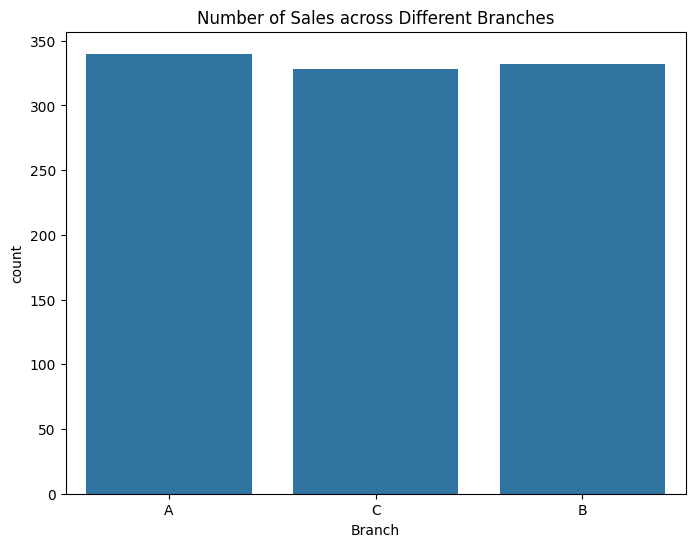

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Branch', data=df)
plt.title('Number of Sales across Different Branches')
plt.show()

# Distribution of customer types

C:\Users\SOUMEN\AppData\Local\Temp\ipykernel_17804\632027300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer type', data=df, palette='Set2')


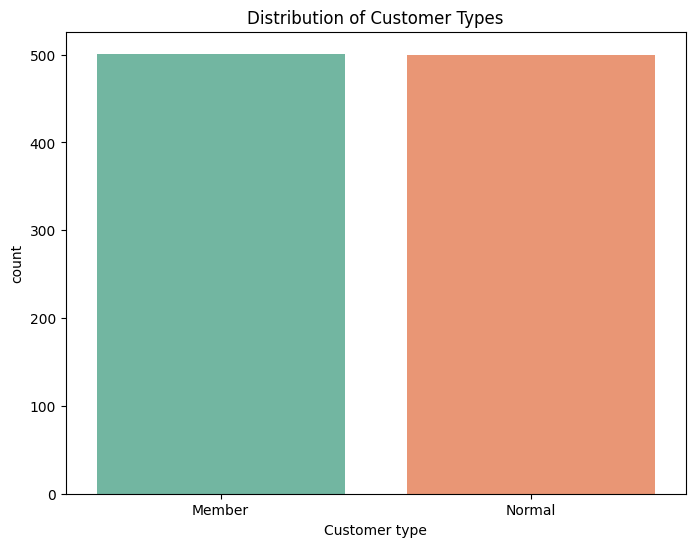

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=df, palette='Set2')
plt.title('Distribution of Customer Types')
plt.show()

# Average rating per product line

C:\Users\SOUMEN\AppData\Local\Temp\ipykernel_17804\3066776890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Rating', data=df, palette='coolwarm')


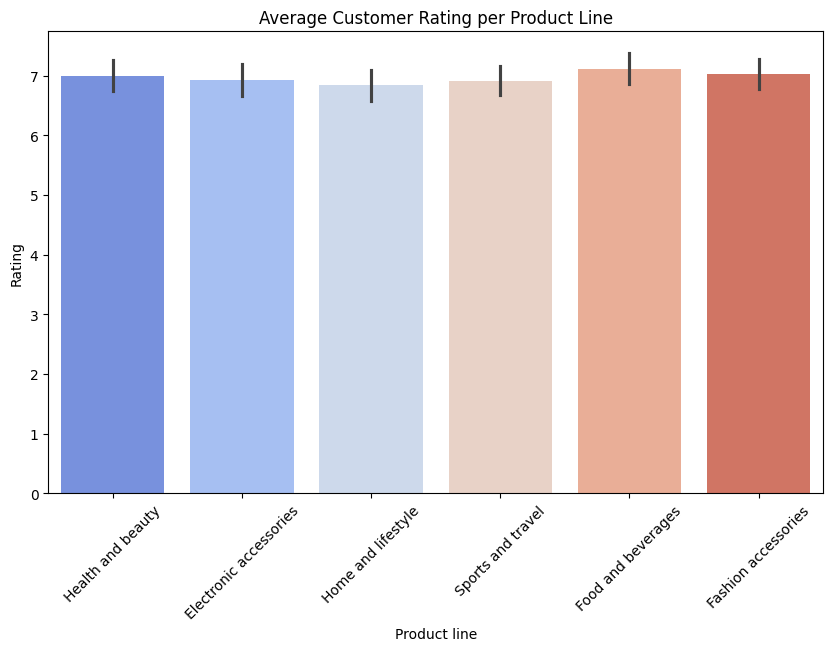

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Rating', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Customer Rating per Product Line')
plt.show()

# Total sales by payment method

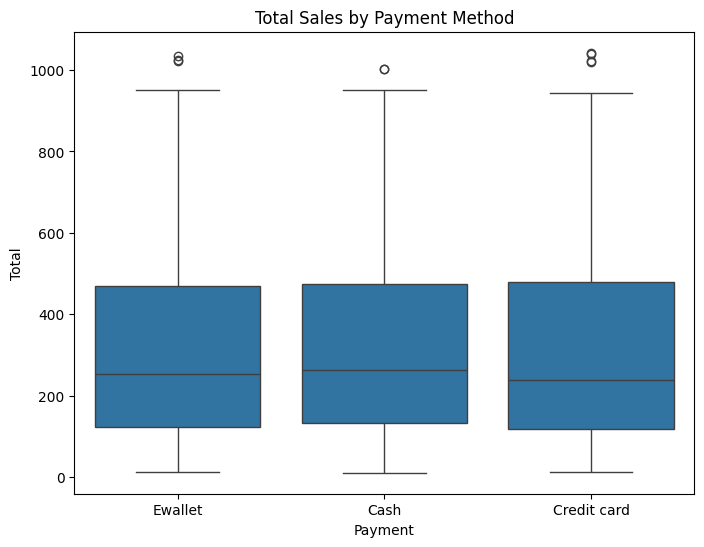

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Payment', y='Total', data=df)
plt.title('Total Sales by Payment Method')
plt.show()